In [218]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

#Visualization section
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import random

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [219]:
crop = pd.read_csv('Crop_recommendation.csv')

In [220]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [221]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [222]:
crop.size

17600

In [223]:
crop.shape

(2200, 8)

In [224]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [225]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [226]:
crop.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [227]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [228]:
corr = crop.corr(numeric_only=True)
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

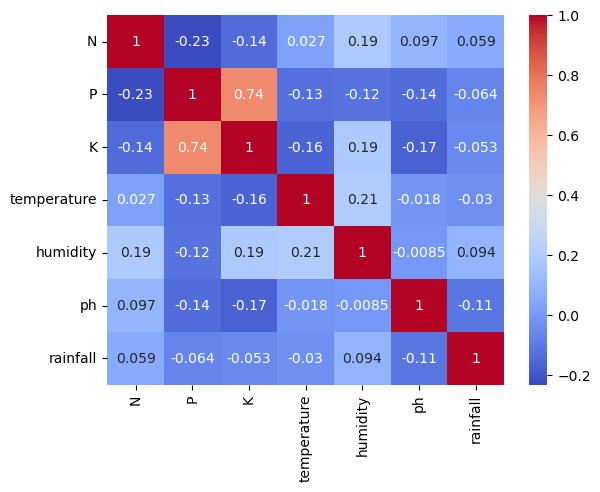

In [229]:
import seaborn as sns
sns.heatmap(corr, annot=True, cbar=True, cmap='coolwarm')

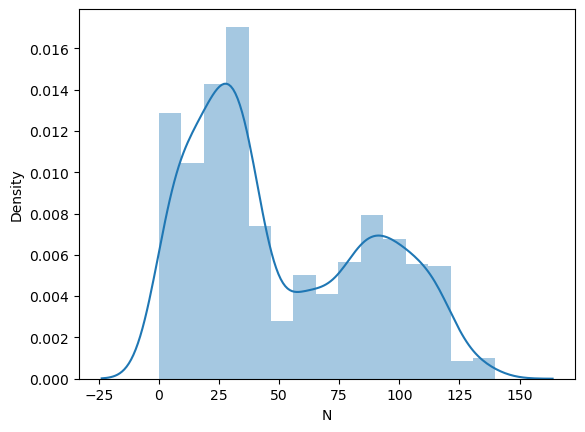

In [230]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

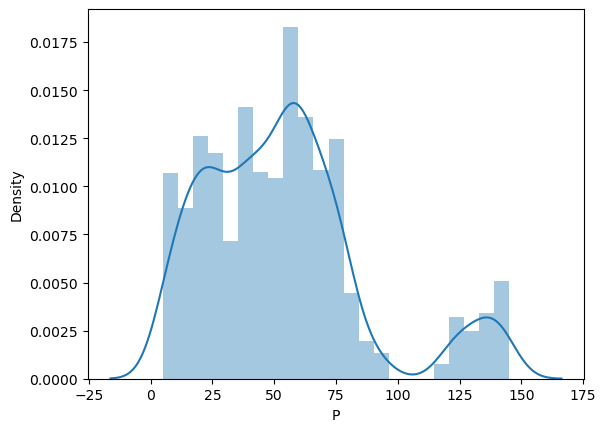

In [231]:
import matplotlib.pyplot as plt
sns.distplot(crop['P'])
plt.show()

In [232]:
crop_summary = pd.pivot_table(crop,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


Data Visualization and Analysis

Nitrogen Analysis

In [233]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Phosphorus Analysis

In [234]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Potassium Analysis

In [235]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

N, P, K values comparison between crops

In [236]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potassium',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [237]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potassium(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'}, 
                                            {'type':'domain'}]])

rice_npk = crop_summary[crop_summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

cotton_npk = crop_summary[crop_summary.index=='cotton']
values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton"),1, 2)

jute_npk = crop_summary[crop_summary.index=='jute']
values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Jute"),1, 3)

maize_npk = crop_summary[crop_summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)

lentil_npk = crop_summary[crop_summary.index=='lentil']
values = [lentil_npk['N'][0], lentil_npk['P'][0], lentil_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil"),1, 5)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, cotton, jute, maize, lentil",
    annotations=[dict(text='Rice',x=0.06,y=0.95, font_size=15, showarrow=False),
                 dict(text='Cotton',x=0.26,y=0.95, font_size=15, showarrow=False),
                 dict(text='Jute',x=0.50,y=0.95, font_size=15, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.95, font_size=15, showarrow=False),
                dict(text='Lentil',x=0.94,y=0.95, font_size=15, showarrow=False)])
fig.show()

NPK ratio for fruits

In [238]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potassium(K)']
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[
         {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs)
cafe_colors =  ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

apple_npk = crop_summary[crop_summary.index=='apple']
values = [apple_npk['N'][0], apple_npk['P'][0], apple_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Apple", marker_colors=cafe_colors),1, 1)

banana_npk = crop_summary[crop_summary.index=='banana']
values = [banana_npk['N'][0], banana_npk['P'][0], banana_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Banana", marker_colors=cafe_colors),1, 2)

grapes_npk = crop_summary[crop_summary.index=='grapes']
values = [grapes_npk['N'][0], grapes_npk['P'][0], grapes_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Grapes", marker_colors=cafe_colors),1, 3)

orange_npk = crop_summary[crop_summary.index=='orange']
values = [orange_npk['N'][0], orange_npk['P'][0], orange_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Orange", marker_colors=cafe_colors),1, 4)

mango_npk = crop_summary[crop_summary.index=='mango']
values = [mango_npk['N'][0], mango_npk['P'][0], mango_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Mango", marker_colors=cafe_colors),1, 5)

coconut_npk = crop_summary[crop_summary.index=='coconut']
values = [coconut_npk['N'][0], coconut_npk['P'][0], coconut_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Coconut", marker_colors=cafe_colors),2, 1)

papaya_npk = crop_summary[crop_summary.index=='papaya']
values = [papaya_npk['N'][0], papaya_npk['P'][0], papaya_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Papaya", marker_colors=cafe_colors),2, 2)

pomegranate_npk = crop_summary[crop_summary.index=='pomegranate']
values = [pomegranate_npk['N'][0], pomegranate_npk['P'][0], pomegranate_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Pomegranate", marker_colors=cafe_colors),2, 3)

watermelon_npk = crop_summary[crop_summary.index=='watermelon']
values = [watermelon_npk['N'][0], watermelon_npk['P'][0], watermelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Watermelon", marker_colors=cafe_colors),2, 4)

muskmelon_npk = crop_summary[crop_summary.index=='muskmelon']
values = [muskmelon_npk['N'][0], muskmelon_npk['P'][0], muskmelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Muskmelon", marker_colors=cafe_colors),2, 5)

fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=[dict(text='Apple',x=0.06,y=1.08, font_size=15, showarrow=False),
                 dict(text='Banana',x=0.26,y=1.08, font_size=15, showarrow=False),
                 dict(text='Grapes',x=0.50,y=1.08, font_size=15, showarrow=False),
                 dict(text='Orange',x=0.74,y=1.08, font_size=15, showarrow=False),
                dict(text='Mango',x=0.94,y=1.08, font_size=15, showarrow=False),
                dict(text='Coconut',x=0.06,y=0.46, font_size=15, showarrow=False),
                 dict(text='Papaya',x=0.26,y=0.46, font_size=15, showarrow=False),
                 dict(text='Pomegranate',x=0.50,y=0.46, font_size=15, showarrow=False),
                 dict(text='Watermelon',x=0.74,y=0.46, font_size=15, showarrow=False),
                dict(text='Muskmelon',x=0.94,y=0.46, font_size=15, showarrow=False)])
fig.show()

In [239]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

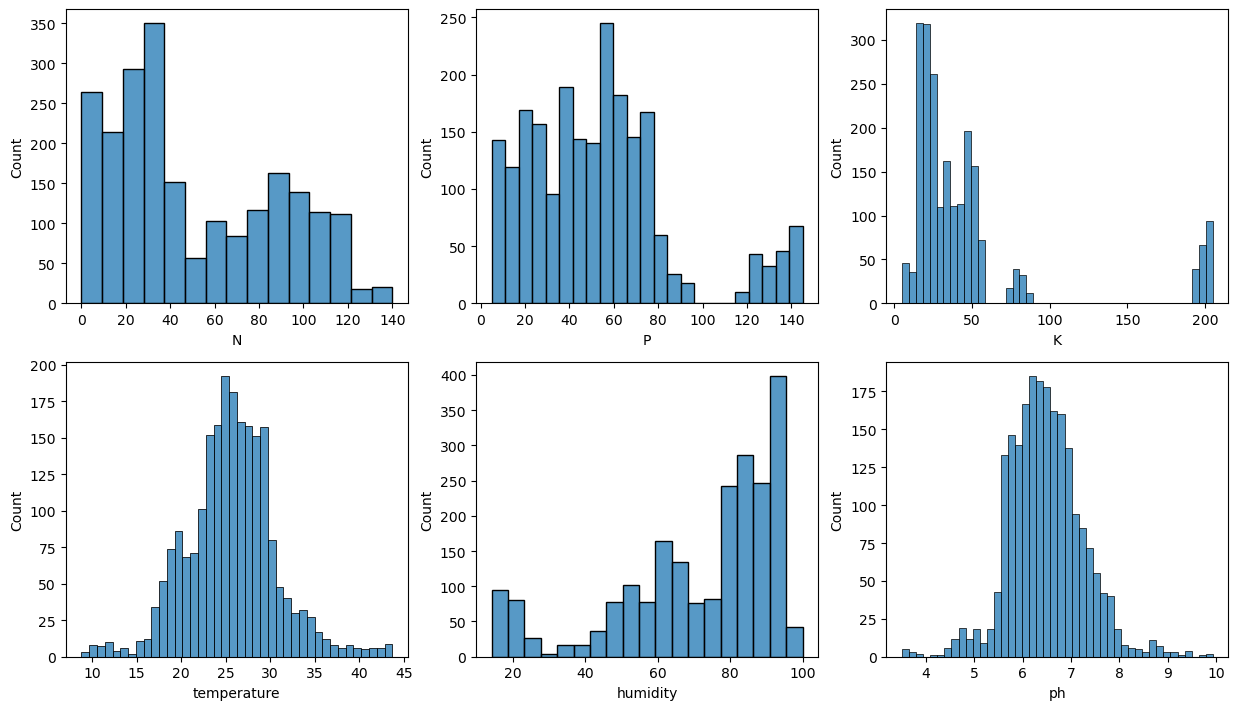

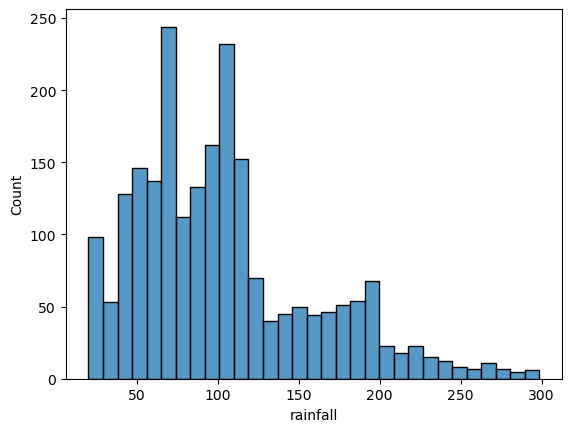

In [240]:
all_columns = crop.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(crop[column])
    i+=1
plt.show()

sns.histplot(crop[all_columns[-1]])
plt.show()

plt.figure(figsize=(19,17))
sns.pairplot(crop, hue = "label")
plt.show()

In [241]:
crop_scatter = crop[(crop['label']=='rice') | 
                      (crop['label']=='jute') | 
                      (crop['label']=='cotton') |
                     (crop['label']=='maize') |
                     (crop['label']=='lentil')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [242]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
models = []

In [243]:
X = crop.drop("label", axis=1)
y = crop['label']
print(X.shape, y.shape)

(2200, 7) (2200,)


In [244]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Train Data: (1760, 7), (1760,)
Test Data: (440, 7), (440,)


In [245]:
label_dict = {}
for i in range(22):
    label_dict[i] = label_encoder.inverse_transform([i])[0]
label_dict

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [246]:
# Print the first few values of the test arrays
print("\nFirst 5 rows of X_test:")
print(X_test[:10])

print("\nFirst 5 values of y_test:")
print(y_test[:10])


First 5 rows of X_test:
[[105.          14.          50.          26.2148837   87.6883982
    6.41905219  59.65590798]
 [ 91.          12.          46.          24.64458469  85.49938185
    6.34394252  48.31219031]
 [ 14.         121.         203.           9.72445761  83.74765639
    6.15868941  74.46411148]
 [ 52.          73.          79.          17.25769499  18.74943955
    7.84033939  94.00287214]
 [ 32.          66.          17.          34.9466155   65.26774011
    7.16235764  70.1415139 ]
 [ 61.          52.          41.          24.97669518  83.891805
    6.88043122 204.8001847 ]
 [ 11.          41.          19.          26.85911286  41.81420849
    5.1317793   44.13827124]
 [ 22.          60.          24.          18.78226261  20.24768314
    5.63066475 104.2570723 ]
 [106.          20.          51.          29.73019662  90.97015715
    6.34257311  20.49035619]
 [ 93.          83.          46.          29.38254012  83.50423735
    5.76530894 109.2486647 ]]

First 5 values o

In [247]:
from sklearn.model_selection import cross_val_score

Random Forest

In [248]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, random_state=0)
model.fit(X_train,y_train)

predicted_values = model.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
models.append('RF')
print("RF's Accuracy is: ", x)
print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      0.95      0.95        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [249]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']
labels = crop['label']

In [250]:
# Cross validation score (Random Forest)
score = cross_val_score(model,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [251]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'model.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(model, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

Make a prediction

In [252]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = model.predict(data)
print(prediction)

['coffee']


In [253]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = model.predict(data)
print(prediction)

['jute']
